Tarea # Laboratorio 3
Integrantes:
-Juárez Torres Carlos Alberto
-Vega Gonzales Ruben

Nombre del programa:
Laboratorio.ipynb

Selección de bibliotecas

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from mpl_toolkits.mplot3d import axes3d

(VGR): importación de datos de la base de datos csv

In [20]:
df = pd.read_csv("xyz.csv")
x= df['Longitud']
y= df['Latitud']
z= -df['Profundidad']

(JTCA): Definición de la función coste

In [21]:
def coste(x,y,z,a,b,c):
    m=len(x)
    error=0.0
    for i in range(m):
        hip=a*x[i]+b*y[i]+c
        error+=(z[i]-hip)**2
    return error/(2*m)

(JTCA): Definición de la función del algoritmo del descenso del gradiente

In [22]:
def dG(x,y,z,a,b,c,alpha,epochs):
    m=len(x)
    hcoste=[]
    for ep in range(epochs):
        a_deriv=0.0; b_deriv=0.0; c_deriv=0.0
        for i in range(m):
            hip=a*x[i]+b*y[i]+c
            c_deriv+=(hip-z[i])
            a_deriv+=(hip-z[i])*x[i]
            b_deriv+=(hip-z[i])*y[i]
            hcoste.append(coste(x,y,z,a,b,c))

        a-=(a_deriv/m)*alpha
        b-=(b_deriv/m)*alpha
        c-=(c_deriv/m)*alpha
    return a,b,c,hcoste

(JTCA): Aplicación de los algoritmos anteriores para obtener un historial y la ecuación del plano en base a un plano generico z=x+y+1 con una taza de aprendizaje de 0.0001 y 100 iteraciones, aunque anteriormente se elaboró con 1000 pero el proceso es tardado.

In [23]:
a=1; b=1; c=1; alpha=0.0001; epochs= 100;
a,b,c,hist=dG(x,y,z,a,b,c,alpha,epochs)

(VGR): Graficación del plano intesectando a la nube de datos

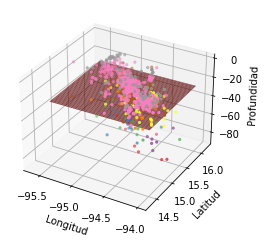

In [28]:
Res=100
x1,y1=np.linspace(-94,-95.5,Res),np.linspace(14.5,16,Res)
X1,Y1=np.meshgrid(x1,y1)

Z1=(a)*X1+(b)*Y1+c

fig=plt.figure()
pl=fig.add_subplot(111,projection='3d')
pl.scatter3D(x,y,z, c=z, cmap='Set1', marker='.')
pl.plot_surface(X1,Y1,Z1,alpha=0.7,color='red',)
pl.set_xlabel("Longitud")
pl.set_ylabel("Latitud")
pl.set_zlabel("Profundidad")
plt.show()


(VGR): impresión de la ecuación del plano

In [29]:
print(f'La ecuación del plano es: {a}x+({b})y+{c}')

La ecuación del plano es: 0.42838319342789455x+(1.0772912135244803)y+1.0060862773303694


(JTCA): Guardado de los resultado del historial en un archivo csv

In [30]:
archivo=open("Historial.txt","w")
archivo.write('hist=%s'%hist)
archivo.close()

historial={'Historial':hist}

DF=pd.DataFrame(historial,columns=['Historial'])
DF.to_csv('Historial.csv')

(VGR): Impresión de resultados del historial para generar la grafica de rendimiento.

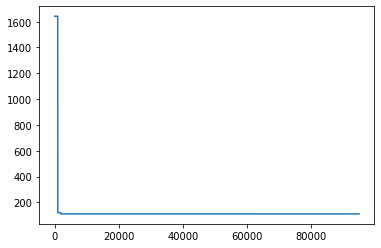

In [31]:
DF=pd.read_csv("Historial.csv")
Y=DF['Historial']
X=np.linspace(1,len(Y),len(Y))
plt.plot(X,Y)
plt.show()